In [1]:
import os
import pickle
import pandas as pd

workdir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/02.concordance_summary"

dp_range = range(1, 31)     
gq_values = [10, 20, 30]       
summary_15x_list = []
summary_30x_list = []
summary_all_list = []

for dp in dp_range:
    for gq in gq_values:
        filename = f"DP{dp}_GQ{gq}_dict.pkl"
        filepath = os.path.join(workdir, filename)
        if not os.path.exists(filepath):
            print(f"Warning: {filename} not found.")
            continue
        
        with open(filepath, 'rb') as f:
            result_dict = pickle.load(f)

        # create keys for 15X, 30X, and ALL
        key1 = frozenset([f'DP{dp}', f'GQ{gq}', '15X'])
        key2 = frozenset([f'DP{dp}', f'GQ{gq}', '30X'])
        key3 = frozenset([f'DP{dp}', f'GQ{gq}', 'ALL'])

        # extract summaries
        try:
            summary_15x_list.append(result_dict[key1][2])
            summary_30x_list.append(result_dict[key2][2])
            summary_all_list.append(result_dict[key3][2])
        except KeyError as e:
            print(f"Missing key in {filename}: {e}")

# Concatenate the lists into DataFrames
summary_15x = pd.concat(summary_15x_list, axis=0)
summary_30x = pd.concat(summary_30x_list, axis=0)
summary_all = pd.concat(summary_all_list, axis=0)

In [2]:
summary_15x.to_csv("summary_15x.csv", index=False)
summary_30x.to_csv("summary_30x.csv", index=False)
summary_all.to_csv("summary_all.csv", index=False)
print("CSV files created successfully.")

CSV files created successfully.


In [6]:
# summary_15x = pd.read_csv("summary_15x.csv")
# summary_30x = pd.read_csv("summary_30x.csv")
# summary_all = pd.read_csv("summary_all.csv")

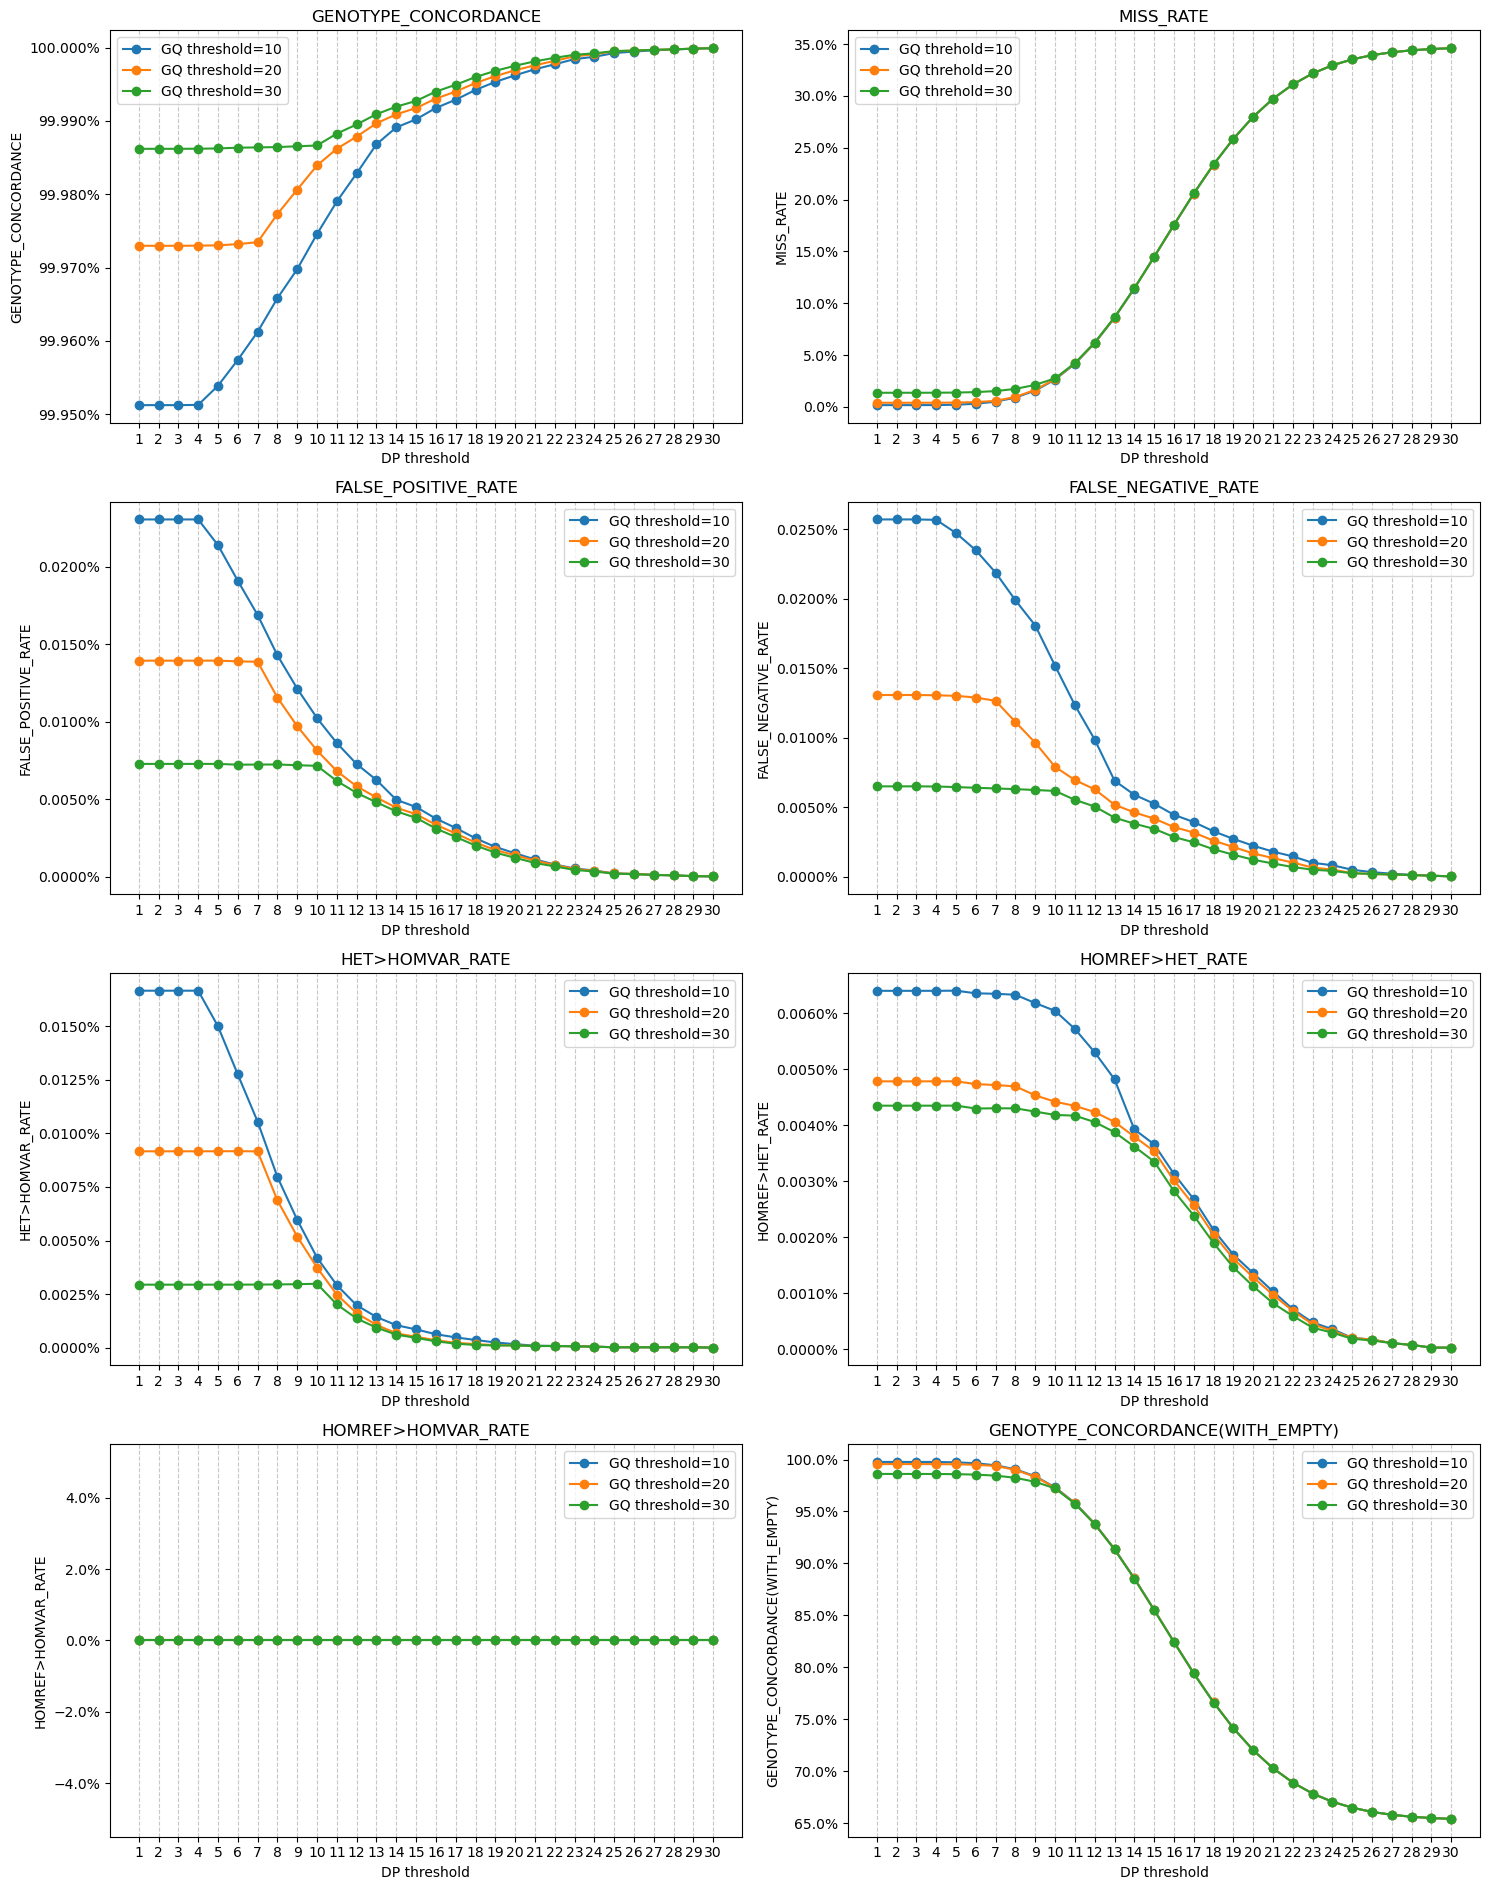

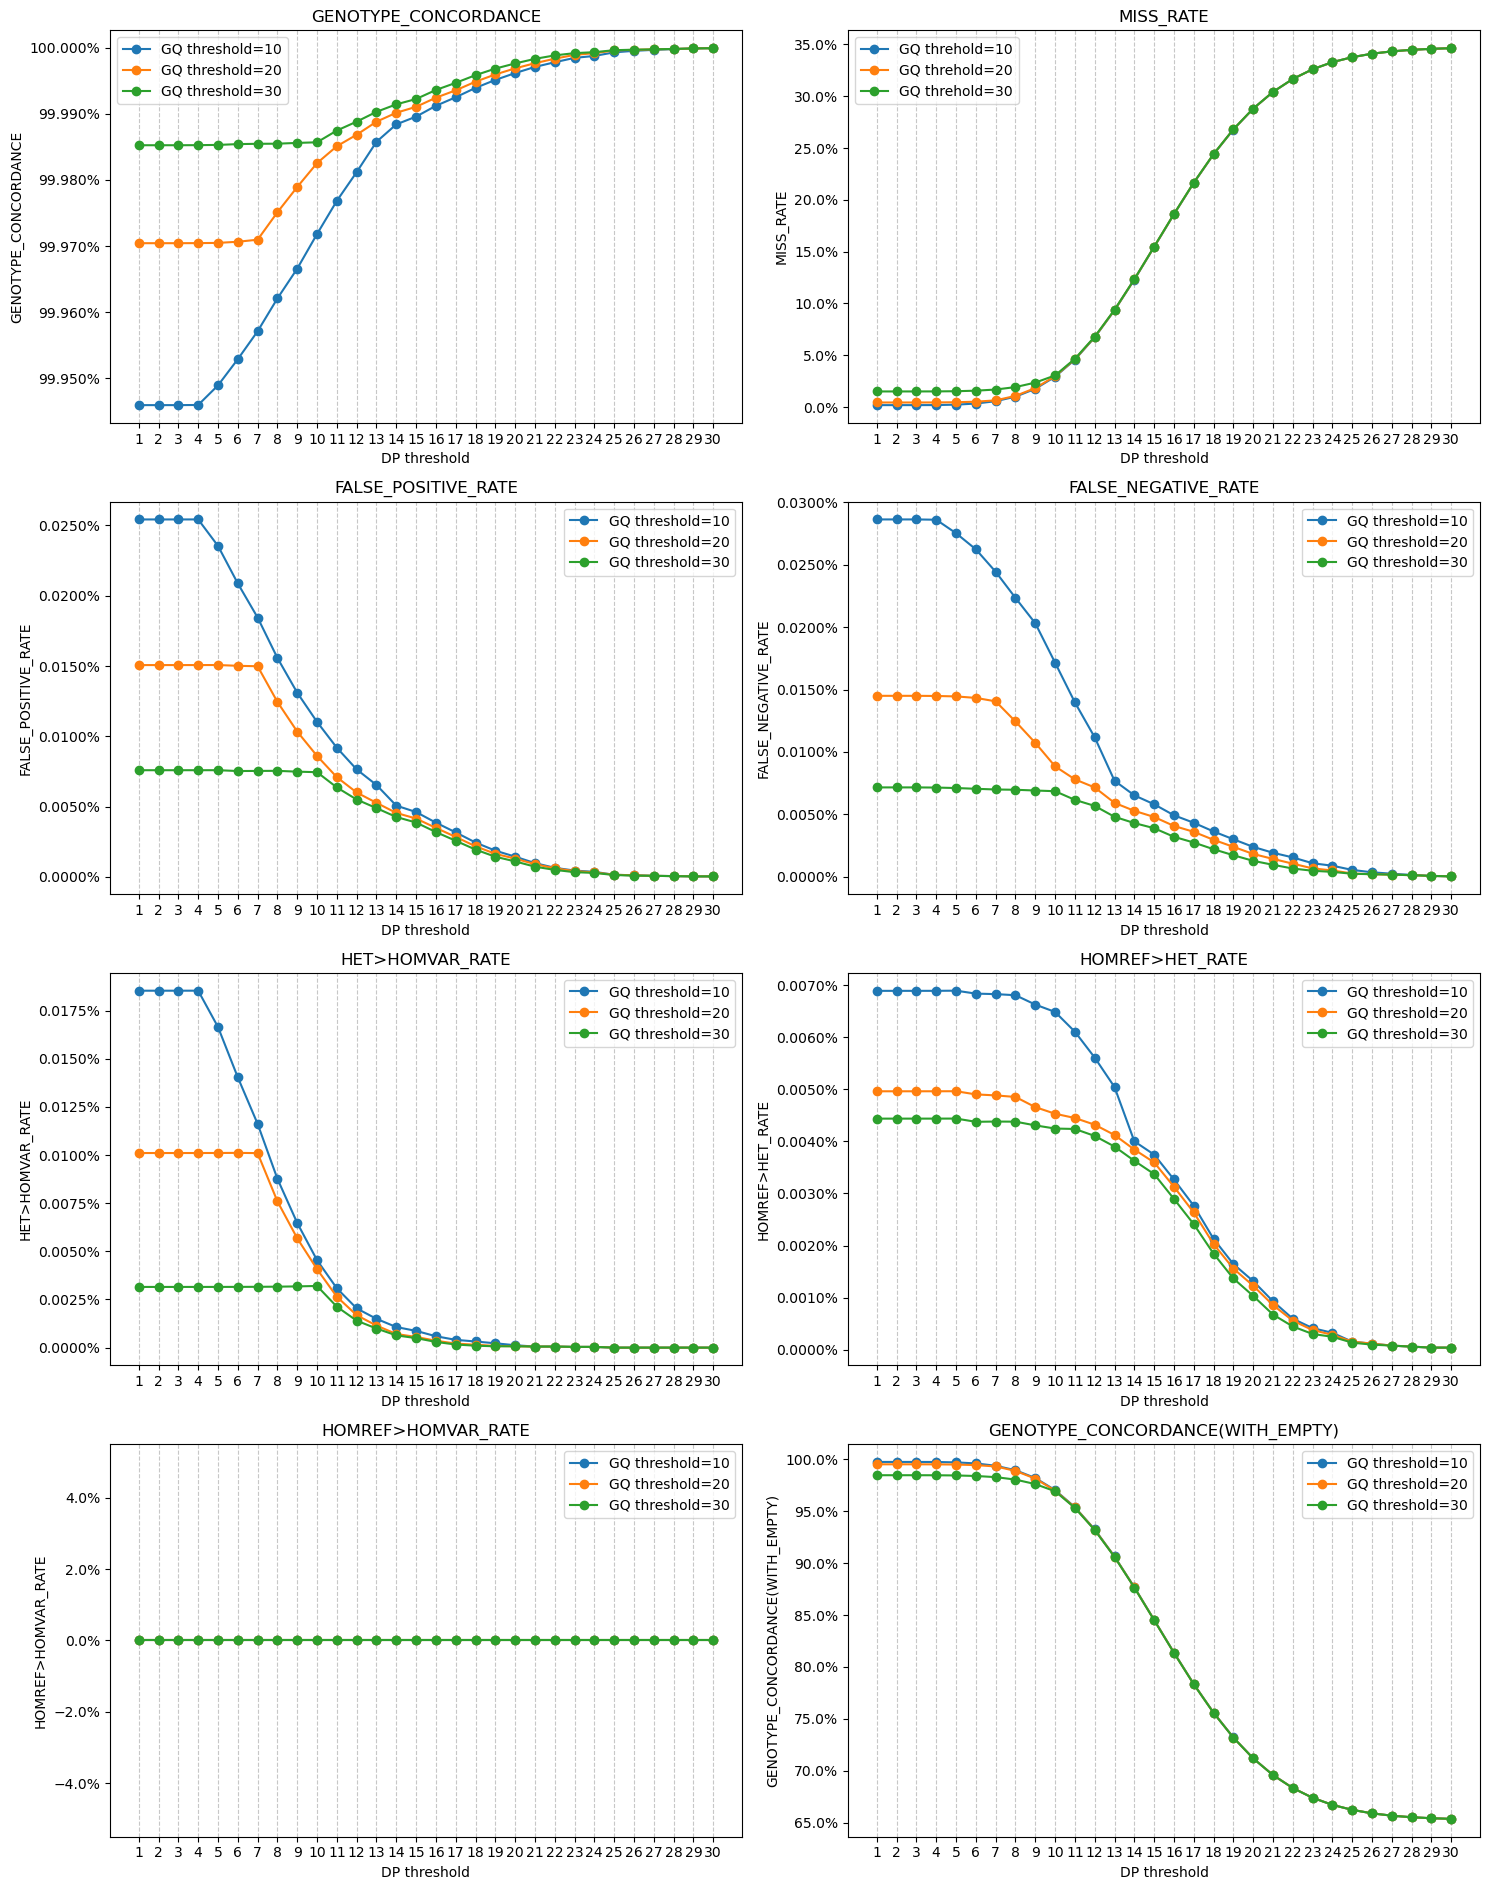

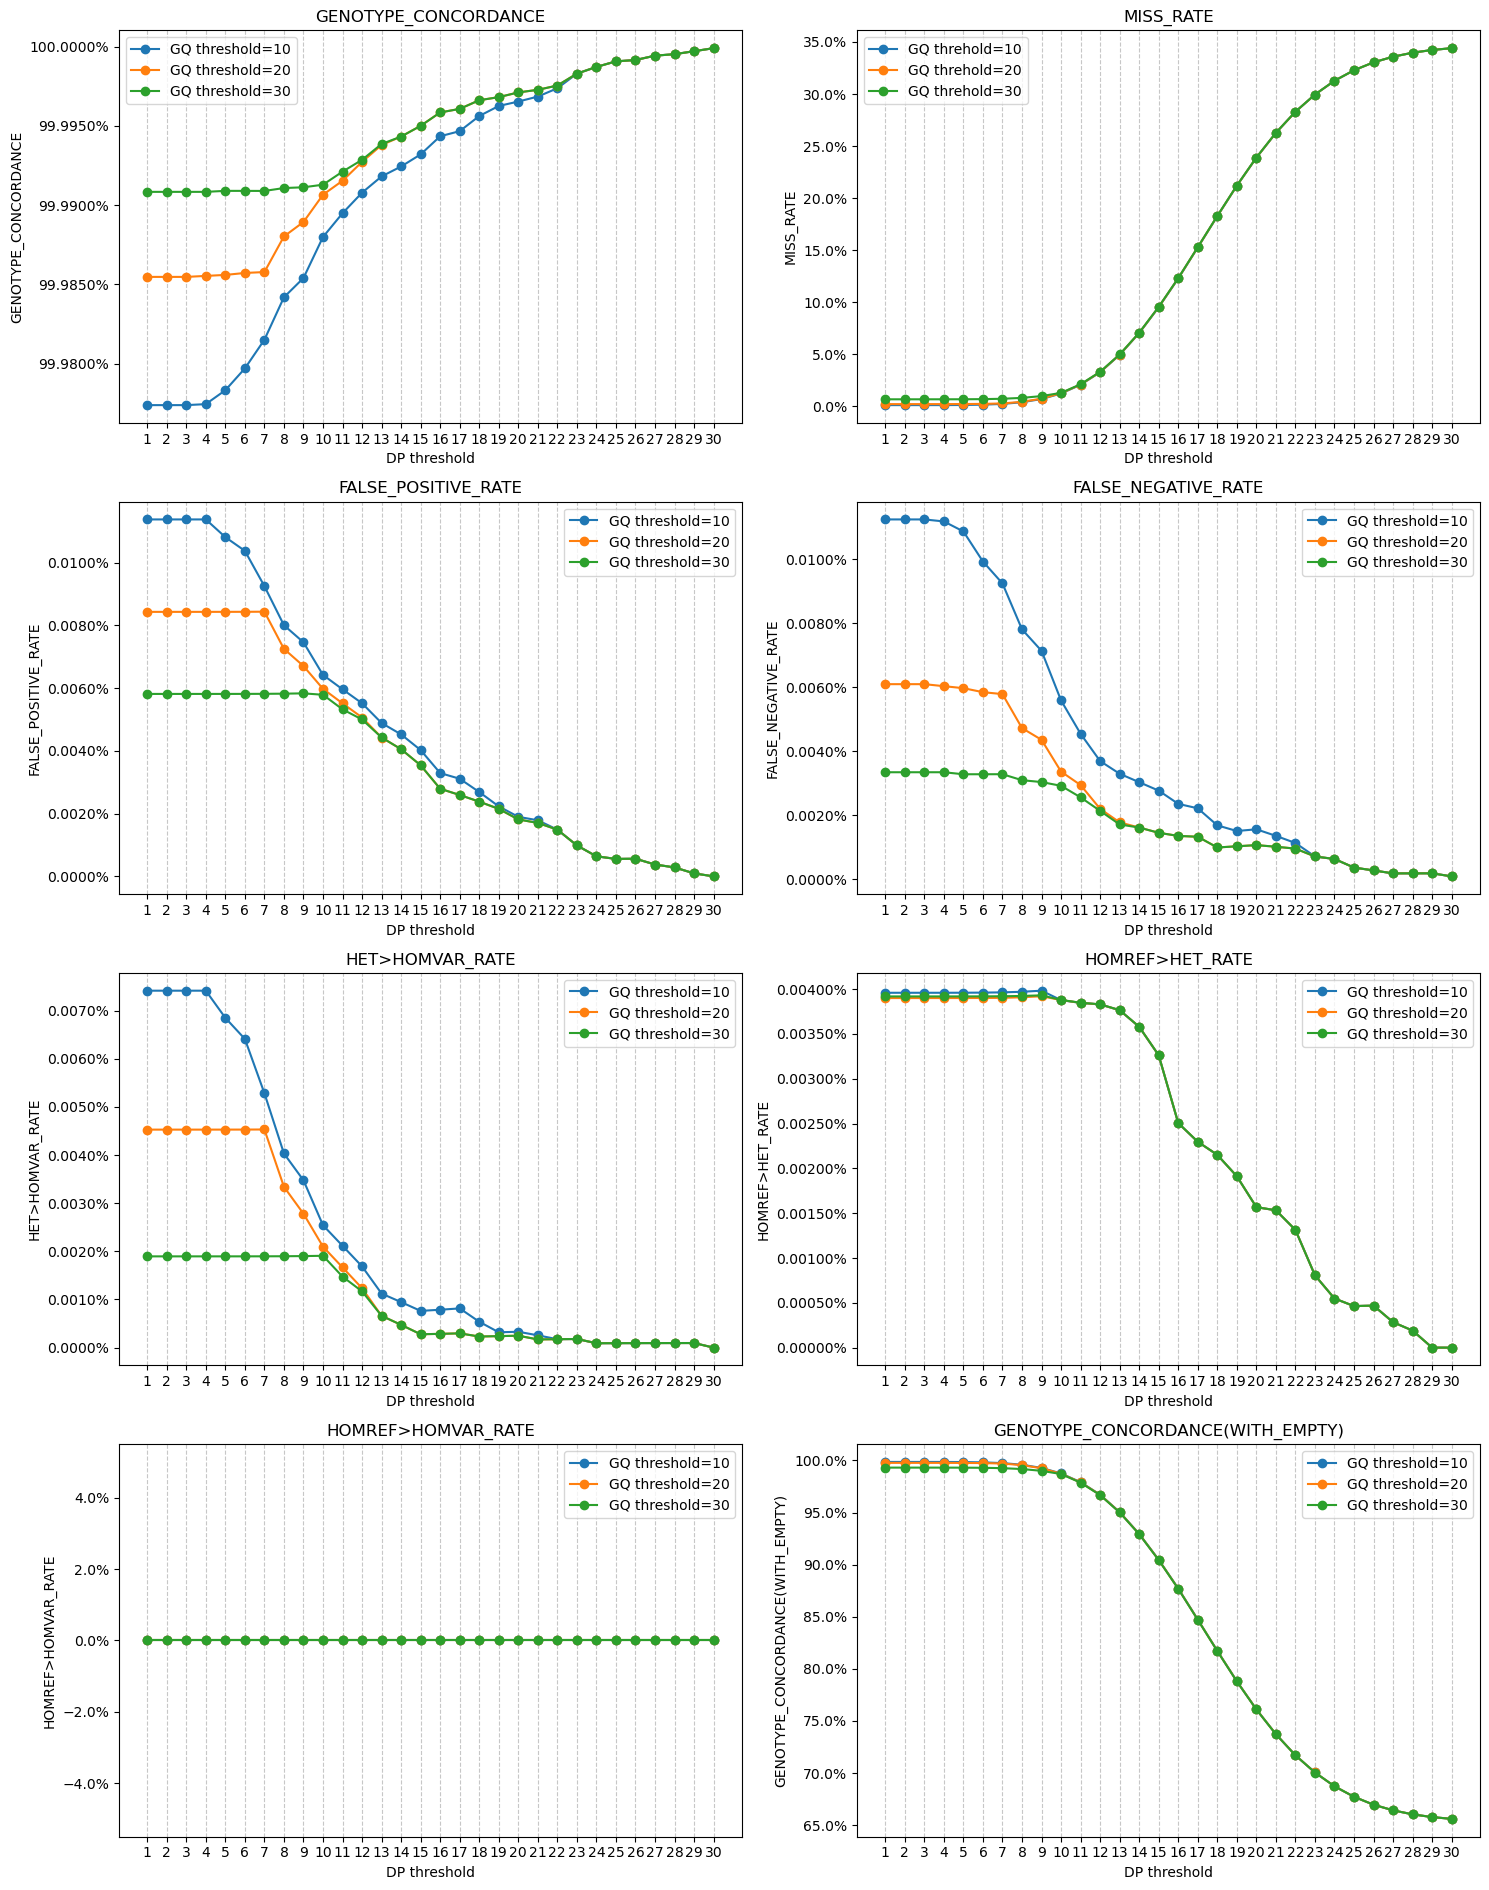

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_concordance(summary_df, dp_range, gq_values):
    
    plt.style.use('default')
    fig, axs = plt.subplots(4, 2, figsize=(15, 19))
    
    # GENOTYPE_CONCORDANCE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[0, 0].plot(subset['DP'], subset['GENOTYPE_CONCORDANCE'], label=f'GQ threshold={gq}', marker="o")
    axs[0, 0].set_xlabel('DP threshold')
    axs[0, 0].set_ylabel('GENOTYPE_CONCORDANCE')
    axs[0, 0].set_title('GENOTYPE_CONCORDANCE')
    axs[0, 0].set_xticks(dp_range)
    axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 0].legend()
    
    axs[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # MISS_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[0, 1].plot(subset['DP'], subset['MISS_RATE'], label=f'GQ threhold={gq}', marker="o")
    axs[0, 1].set_xlabel('DP threshold')
    axs[0, 1].set_ylabel('MISS_RATE')
    axs[0, 1].set_title('MISS_RATE')
    axs[0, 1].set_xticks(dp_range)
    axs[0, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 1].legend()
    
    axs[0, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # FALSE_POSITIVE_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[1, 0].plot(subset['DP'], subset['FALSE_POSITIVE_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[1, 0].set_xlabel('DP threshold')
    axs[1, 0].set_ylabel('FALSE_POSITIVE_RATE')
    axs[1, 0].set_title('FALSE_POSITIVE_RATE')
    axs[1, 0].set_xticks(dp_range)
    axs[1, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 0].legend()
    
    axs[1, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # FALSE_NEGATIVE_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[1, 1].plot(subset['DP'], subset['FALSE_NEGATIVE_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[1, 1].set_xlabel('DP threshold')
    axs[1, 1].set_ylabel('FALSE_NEGATIVE_RATE')
    axs[1, 1].set_title('FALSE_NEGATIVE_RATE')
    axs[1, 1].set_xticks(dp_range)
    axs[1, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 1].legend()
    
    axs[1, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # HET>HOMVAR_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[2, 0].plot(subset['DP'], subset['HET>HOMVAR_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[2, 0].set_xlabel('DP threshold')
    axs[2, 0].set_ylabel('HET>HOMVAR_RATE')
    axs[2, 0].set_title('HET>HOMVAR_RATE')
    axs[2, 0].set_xticks(dp_range)
    axs[2, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[2, 0].legend()
    
    axs[2, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # HOMREF>HET_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[2, 1].plot(subset['DP'], subset['HOMREF>HET_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[2, 1].set_xlabel('DP threshold')
    axs[2, 1].set_ylabel('HOMREF>HET_RATE')
    axs[2, 1].set_title('HOMREF>HET_RATE')
    axs[2, 1].set_xticks(dp_range)
    axs[2, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[2, 1].legend()
    
    axs[2, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # HOMREF>HOMVAR_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[3, 0].plot(subset['DP'], subset['HOMREF>HOMVAR_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[3, 0].set_xlabel('DP threshold')
    axs[3, 0].set_ylabel('HOMREF>HOMVAR_RATE')
    axs[3, 0].set_title('HOMREF>HOMVAR_RATE')
    axs[3, 0].set_xticks(dp_range)
    axs[3, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[3, 0].legend()
    
    axs[3, 0].yaxis.set_major_formatter(PercentFormatter(1.0))

    # GENOTYPE_CONCORDANCE(WITH_EMPTY) vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[3, 1].plot(subset['DP'], subset['GENOTYPE_CONCORDANCE(WITH_EMPTY)'], label=f'GQ threshold={gq}', marker="o")
    axs[3, 1].set_xlabel('DP threshold')
    axs[3, 1].set_ylabel('GENOTYPE_CONCORDANCE(WITH_EMPTY)')
    axs[3, 1].set_title('GENOTYPE_CONCORDANCE(WITH_EMPTY)')
    axs[3, 1].set_xticks(dp_range)
    axs[3, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[3, 1].legend()
    
    axs[3, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    
    plt.tight_layout()
    plt.show()

plot_concordance(summary_all, dp_range, gq_values)
plot_concordance(summary_15x, dp_range, gq_values)
plot_concordance(summary_30x, dp_range, gq_values)


## Summary in all

### GENOTYPE_CONCORDANCE vs MISS_RATE in all

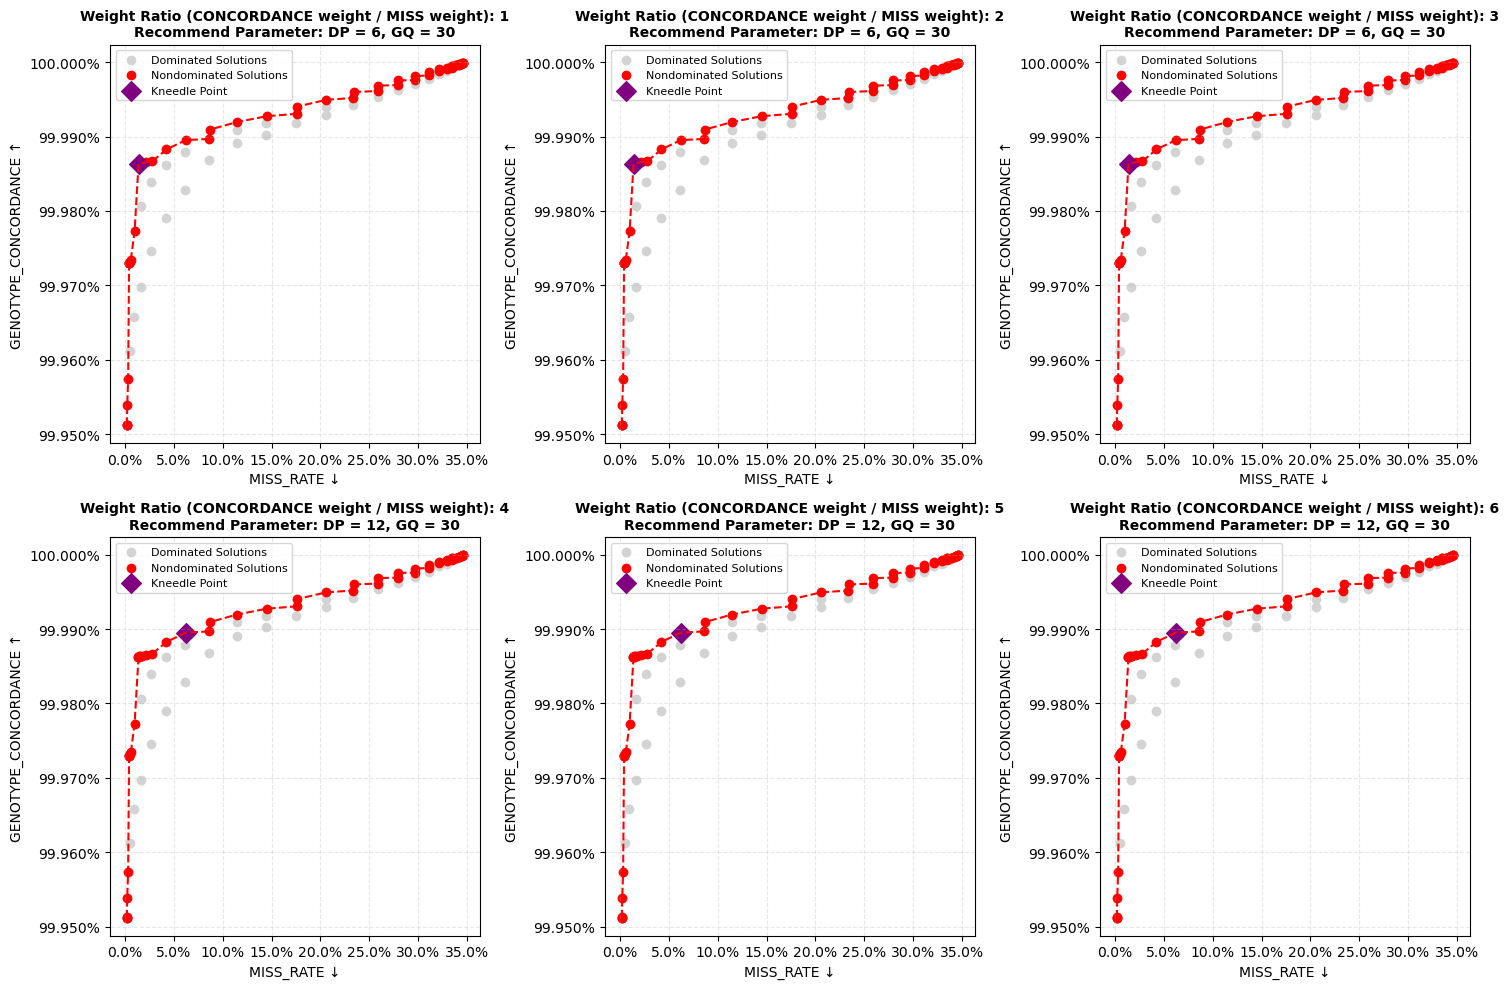

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

# summary_all = summary_all[summary_all['GQ'] == 20]

# === Step 1: Identify Pareto Front ===
def find_pareto_front(df, metric1_col='GENOTYPE_CONCORDANCE', metric2_col='MISS_RATE',
                      maximize_metric1=True, maximize_metric2=False):
    m1 = df[metric1_col].values
    m2 = df[metric2_col].values
    is_efficient = np.ones(len(df), dtype=bool)
    for i in range(len(df)):
        if is_efficient[i]:
            better_m1 = m1 >= m1[i] if maximize_metric1 else m1 <= m1[i]
            better_m2 = m2 >= m2[i] if maximize_metric2 else m2 <= m2[i]
            strictly_better_m1 = m1 > m1[i] if maximize_metric1 else m1 < m1[i]
            strictly_better_m2 = m2 > m2[i] if maximize_metric2 else m2 < m2[i]
            is_dominated = (better_m1 & better_m2) & (strictly_better_m1 | strictly_better_m2)
            is_dominated[i] = False
            if np.any(is_dominated):
                is_efficient[i] = False
    return pd.Series(is_efficient, index=df.index)

# === Step 2: Kneedle 拐点检测（标准化后处理） ===
def find_kneedle_tradeoff_point(df, x_col='MISS_RATE', y_col='GENOTYPE_CONCORDANCE',
                                 curve='concave', direction='increasing', S=1.0, weight_x=1.0, weight_y=1.0):
    df_unique = df[[x_col, y_col, 'DP', 'GQ']].drop_duplicates().sort_values(by=x_col)
    x = df_unique[x_col].values
    y = df_unique[y_col].values

    # 标准化 (Kneedle 会自动处理)
    scaler = MinMaxScaler()
    xy_scaled = scaler.fit_transform(np.column_stack((x, y)))
    x_scaled = xy_scaled[:, 0]
    y_scaled = xy_scaled[:, 1]

    # 使用 Kneedle
    kneedle = KneeLocator(x, y, curve=curve, direction=direction, S=S, weight_x=weight_x, weight_y=weight_y)

    if kneedle.knee is not None:
        # 正确查找 knee 对应的索引
        knee_index = np.where(x == kneedle.knee)[0][0]
        x_real = x[knee_index]
        y_real = y[knee_index]
        dp = df_unique['DP'].iloc[knee_index]
        gq = df_unique['GQ'].iloc[knee_index]
        return x_real, y_real, dp, gq, scaler, kneedle
    else:
        return None, None, None, None, scaler, kneedle

# === Step 3: 加载数据（你需要提前准备 summary_all） ===

# summary_all['GENOTYPE_CONCORDANCE'] = summary_all['GENOTYPE_CONCORDANCE'].round(10)
# summary_all['MISS_RATE'] = summary_all['MISS_RATE'].round(10)

# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_all)
pareto_df_sorted = summary_all[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

weights = [1, 2, 3, 4, 5, 6]

for i, weight_concord in enumerate(weights):
    weight_miss = 1.0

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='GENOTYPE_CONCORDANCE',
        curve='concave',
        direction='increasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_all['MISS_RATE'], summary_all['GENOTYPE_CONCORDANCE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['GENOTYPE_CONCORDANCE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['GENOTYPE_CONCORDANCE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (CONCORDANCE weight / MISS weight): {weight_concord}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_concord}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("GENOTYPE_CONCORDANCE ↑", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.style.use('default')
plt.tight_layout()
plt.show()

### FALSE_POSITIVE_RATE vs MISS_RATE in all

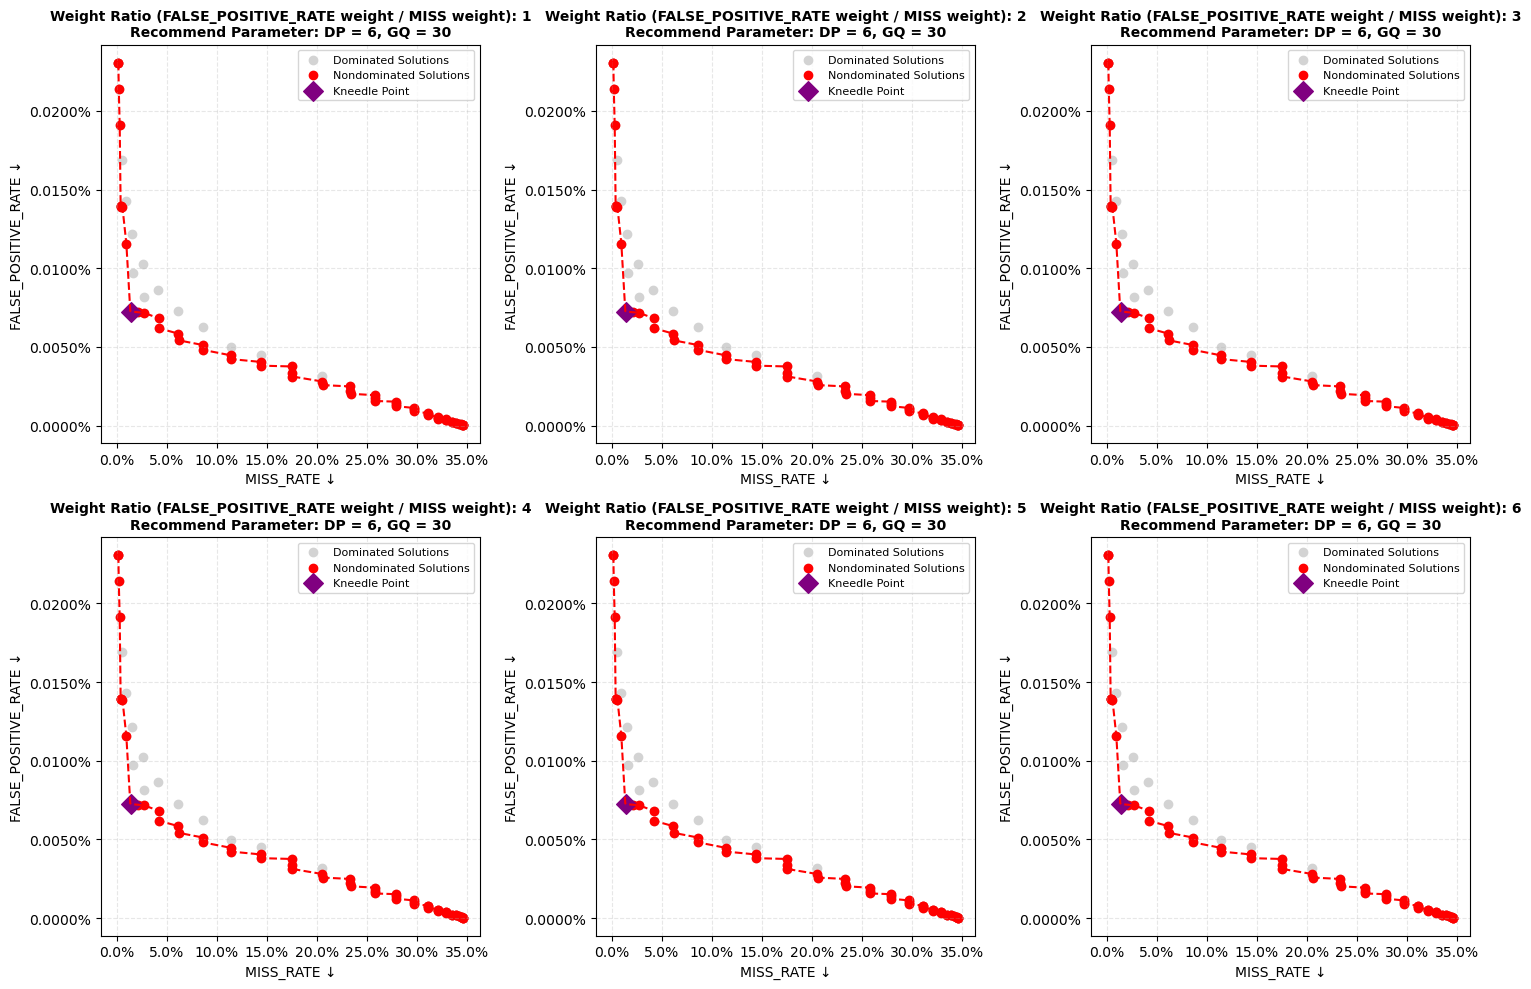

In [4]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_all, metric1_col='FALSE_POSITIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_all[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_POSITIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_all['MISS_RATE'], summary_all['FALSE_POSITIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_POSITIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_POSITIVE_RATE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_POSITIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_POSITIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

### FALSE_NEGATIVE_RATE vs MISS_RATE in all

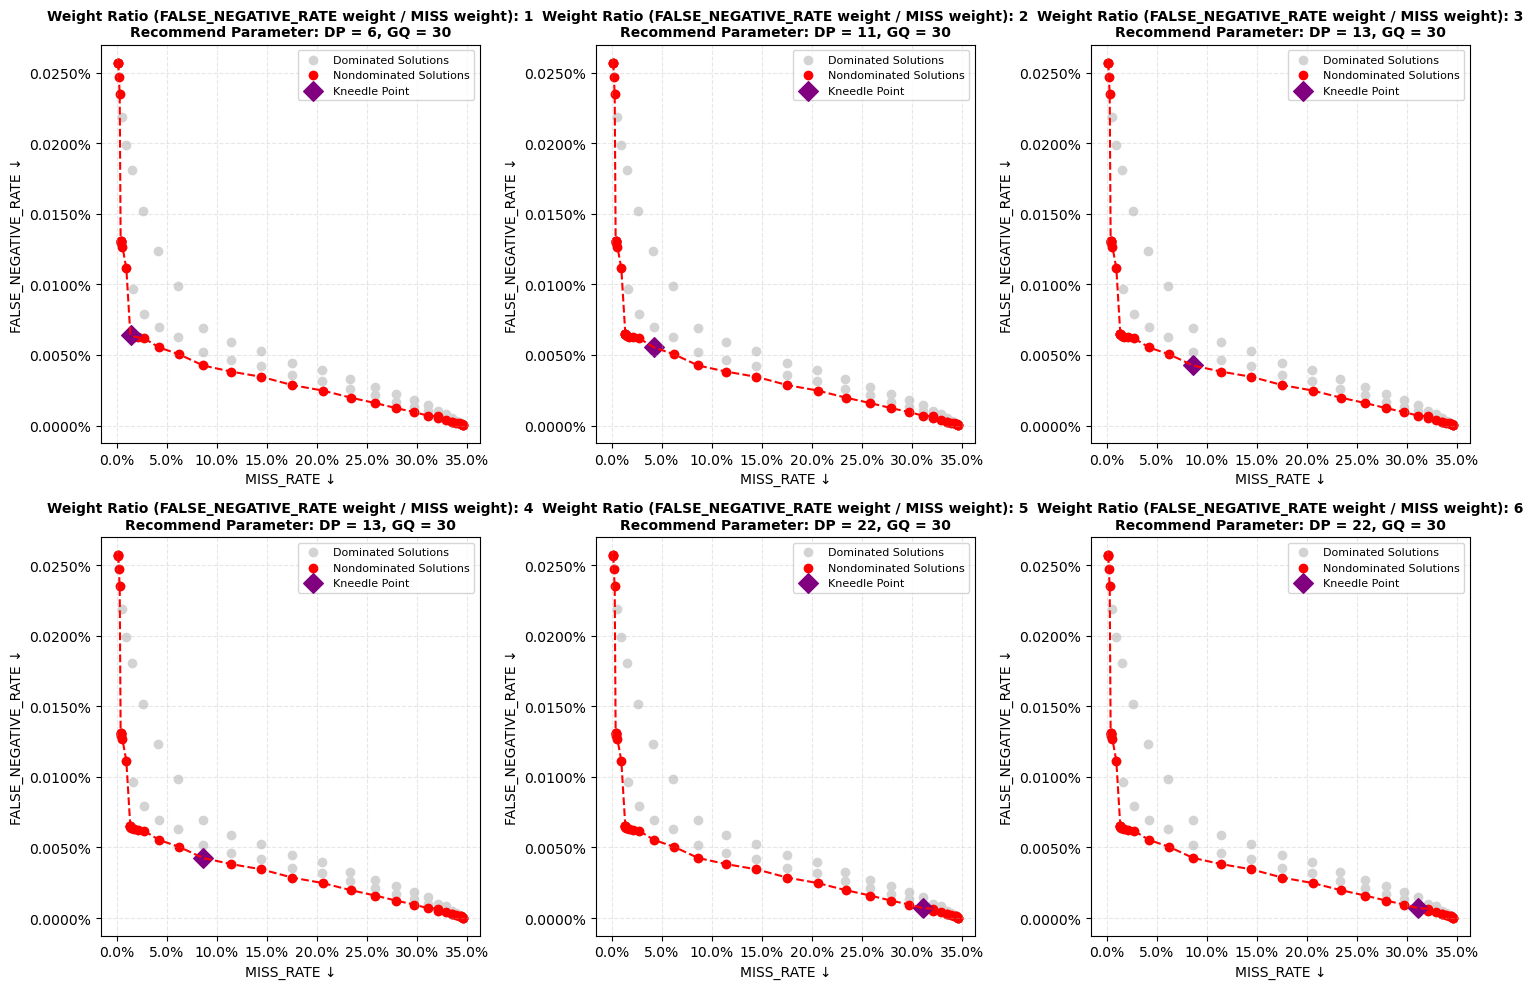

In [5]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_all, metric1_col='FALSE_NEGATIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_all[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_NEGATIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_all['MISS_RATE'], summary_all['FALSE_NEGATIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_NEGATIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_NEGATIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

## Summary in 15x

### GENOTYPE_CONCORDANCE vs MISS_RATE in 15x

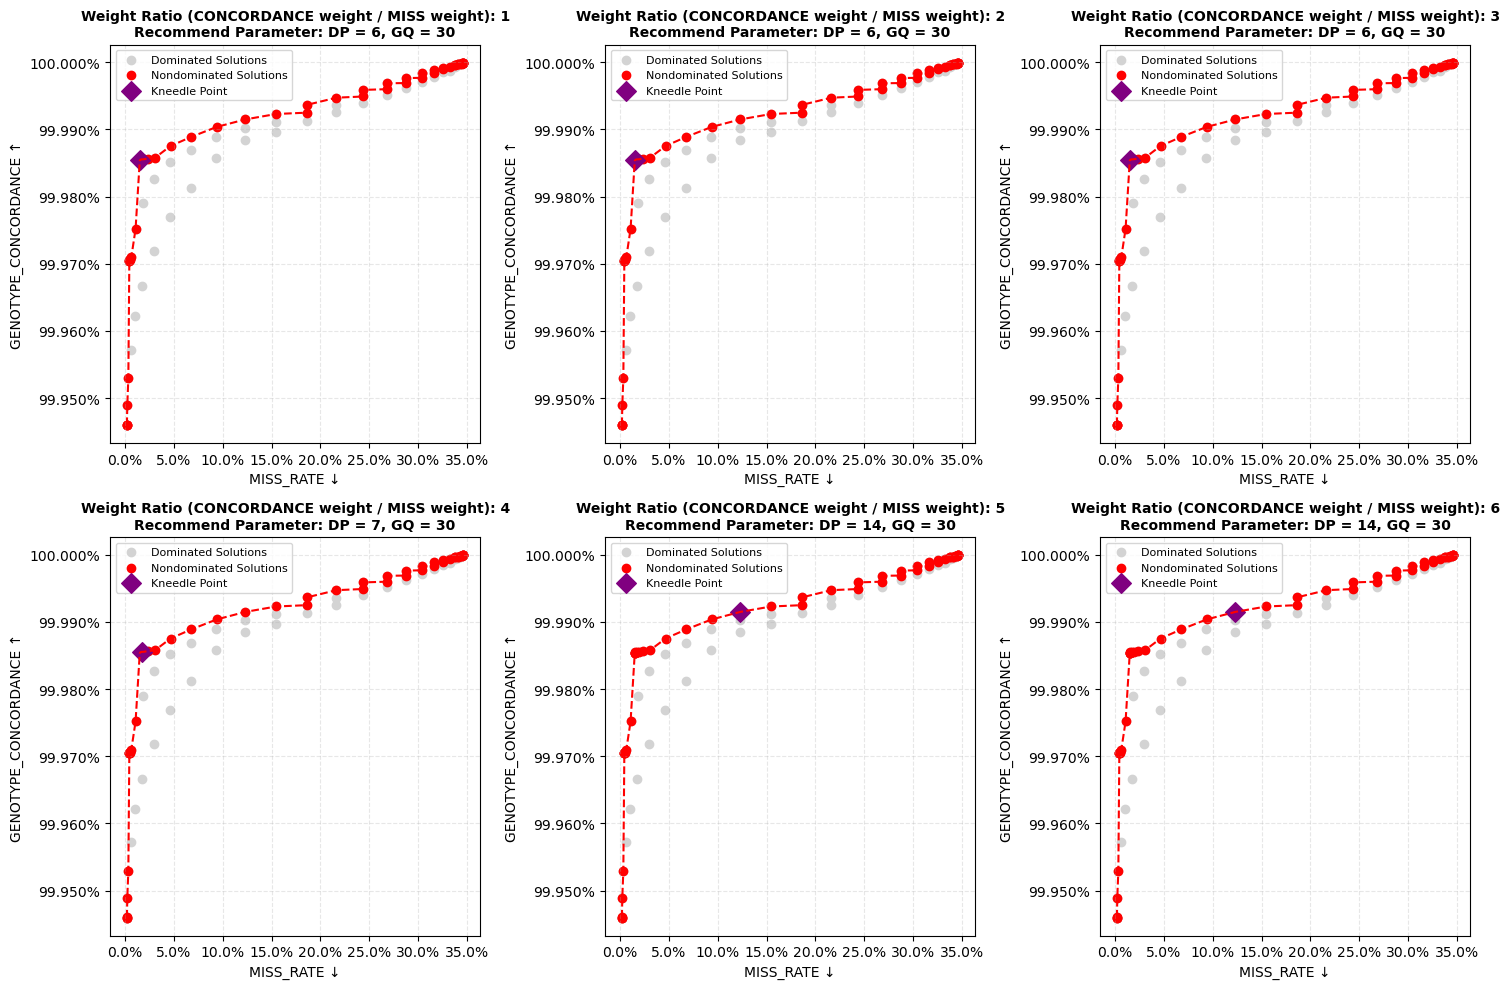

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

# === Step 1: Identify Pareto Front ===
def find_pareto_front(df, metric1_col='GENOTYPE_CONCORDANCE', metric2_col='MISS_RATE',
                      maximize_metric1=True, maximize_metric2=False):
    m1 = df[metric1_col].values
    m2 = df[metric2_col].values
    is_efficient = np.ones(len(df), dtype=bool)
    for i in range(len(df)):
        if is_efficient[i]:
            better_m1 = m1 >= m1[i] if maximize_metric1 else m1 <= m1[i]
            better_m2 = m2 >= m2[i] if maximize_metric2 else m2 <= m2[i]
            strictly_better_m1 = m1 > m1[i] if maximize_metric1 else m1 < m1[i]
            strictly_better_m2 = m2 > m2[i] if maximize_metric2 else m2 < m2[i]
            is_dominated = (better_m1 & better_m2) & (strictly_better_m1 | strictly_better_m2)
            is_dominated[i] = False
            if np.any(is_dominated):
                is_efficient[i] = False
    return pd.Series(is_efficient, index=df.index)

# === Step 2: Kneedle 拐点检测（标准化后处理） ===
def find_kneedle_tradeoff_point(df, x_col='MISS_RATE', y_col='GENOTYPE_CONCORDANCE',
                                 curve='concave', direction='increasing', S=1.0, weight_x=1.0, weight_y=1.0):
    df_unique = df[[x_col, y_col, 'DP', 'GQ']].drop_duplicates().sort_values(by=x_col)
    x = df_unique[x_col].values
    y = df_unique[y_col].values

    # 标准化 (Kneedle 会自动处理)
    scaler = MinMaxScaler()
    xy_scaled = scaler.fit_transform(np.column_stack((x, y)))
    x_scaled = xy_scaled[:, 0]
    y_scaled = xy_scaled[:, 1]

    # 使用 Kneedle
    kneedle = KneeLocator(x, y, curve=curve, direction=direction, S=S, weight_x=weight_x, weight_y=weight_y)

    if kneedle.knee is not None:
        # 正确查找 knee 对应的索引
        knee_index = np.where(x == kneedle.knee)[0][0]
        x_real = x[knee_index]
        y_real = y[knee_index]
        dp = df_unique['DP'].iloc[knee_index]
        gq = df_unique['GQ'].iloc[knee_index]
        return x_real, y_real, dp, gq, scaler, kneedle
    else:
        return None, None, None, None, scaler, kneedle

# === Step 3: 加载数据（你需要提前准备 summary_all） ===

# summary_all['GENOTYPE_CONCORDANCE'] = summary_all['GENOTYPE_CONCORDANCE'].round(10)
# summary_all['MISS_RATE'] = summary_all['MISS_RATE'].round(10)

# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_15x)
pareto_df_sorted = summary_15x[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='GENOTYPE_CONCORDANCE',
        curve='concave',
        direction='increasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_15x['MISS_RATE'], summary_15x['GENOTYPE_CONCORDANCE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['GENOTYPE_CONCORDANCE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['GENOTYPE_CONCORDANCE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (CONCORDANCE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("GENOTYPE_CONCORDANCE ↑", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.style.use('default')
plt.tight_layout()
plt.show()

### FALSE_POSITIVE_RATE vs MISS_RATE in 15x

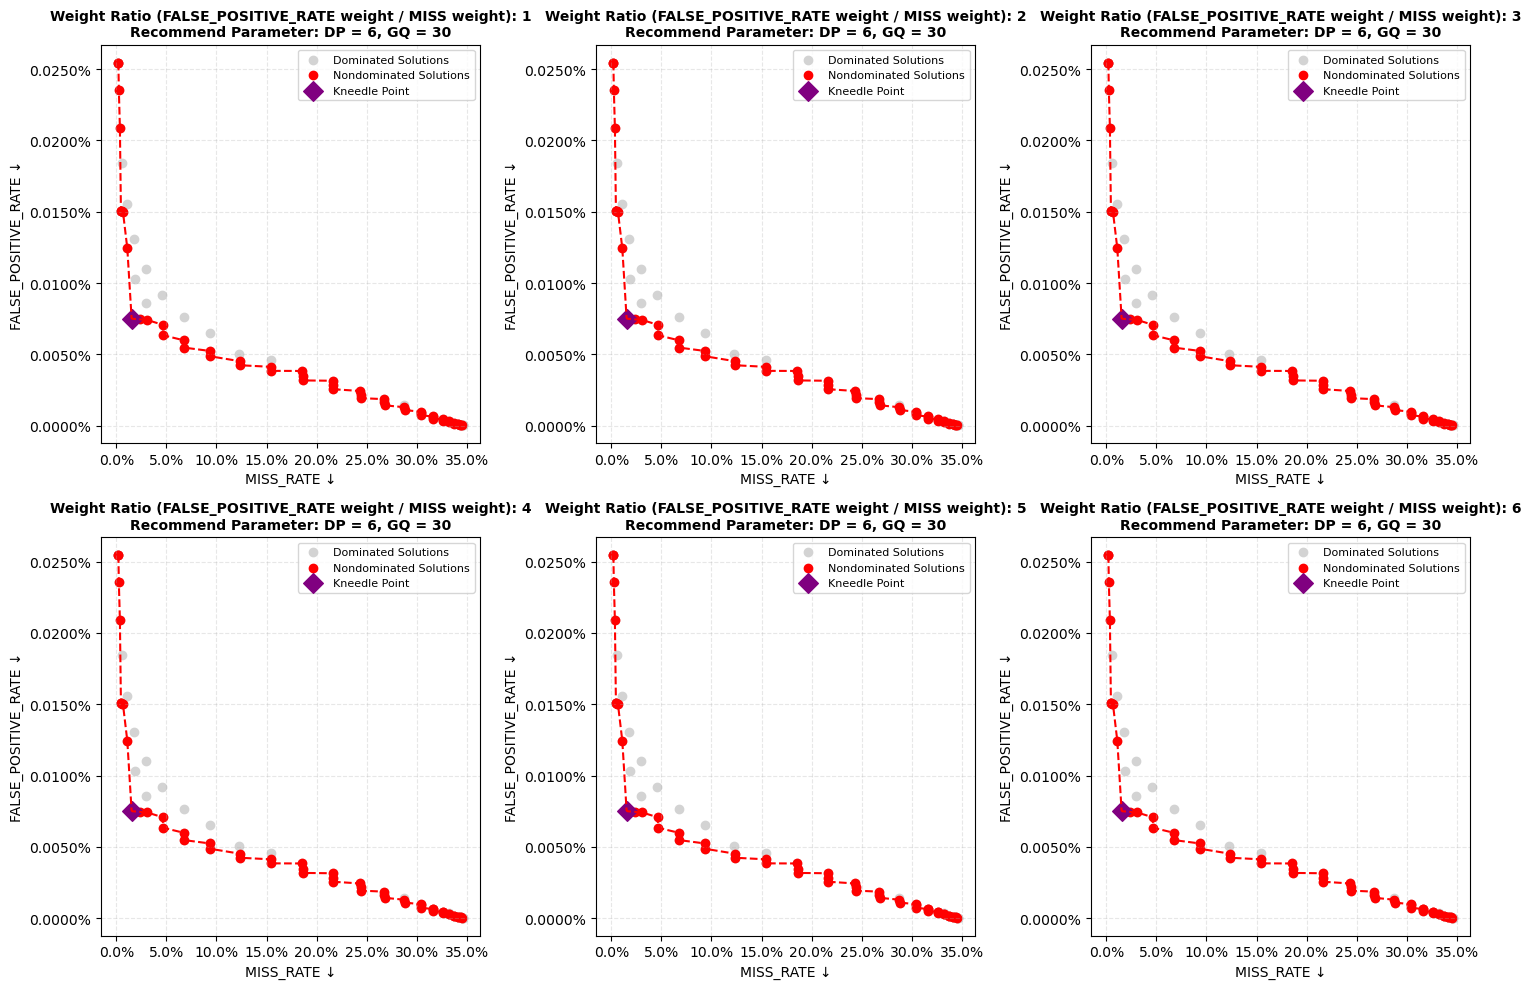

In [8]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_15x, metric1_col='FALSE_POSITIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_15x[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_POSITIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_15x['MISS_RATE'], summary_15x['FALSE_POSITIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_POSITIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_POSITIVE_RATE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_POSITIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_POSITIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

### FALSE_NEGATIVE_RATE vs MISS_RATE in 15x

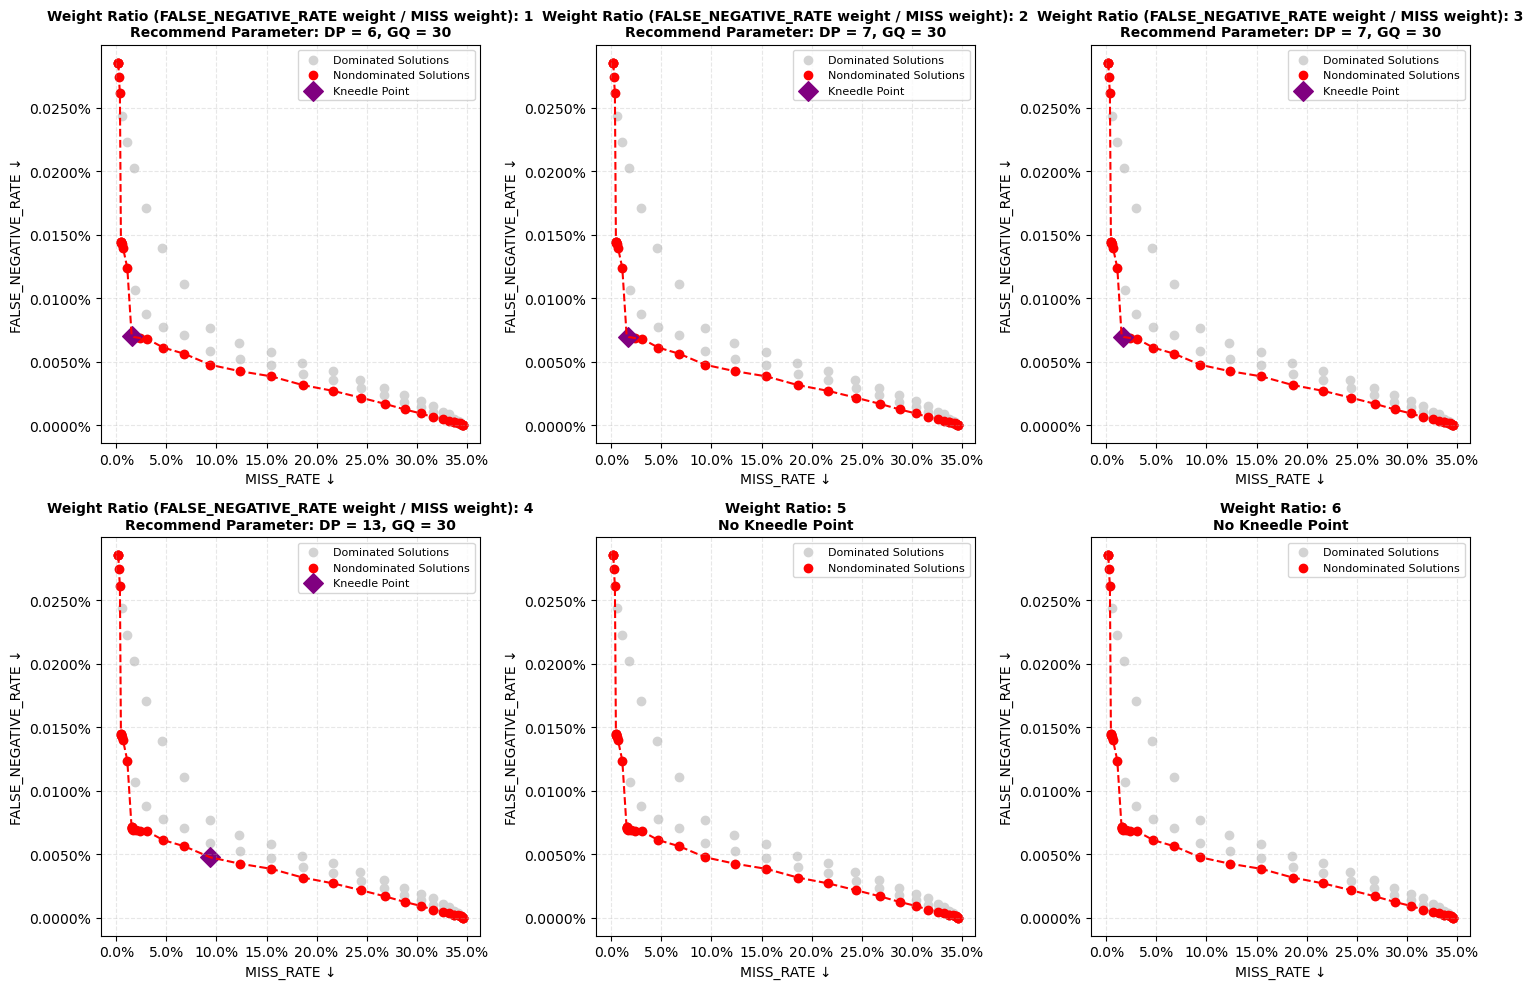

In [9]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_15x, metric1_col='FALSE_NEGATIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_15x[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_NEGATIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_15x['MISS_RATE'], summary_15x['FALSE_NEGATIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_NEGATIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_NEGATIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

## Summary in 30x

### GENOTYPE_CONCORDANCE vs MISS_RATE in 30x

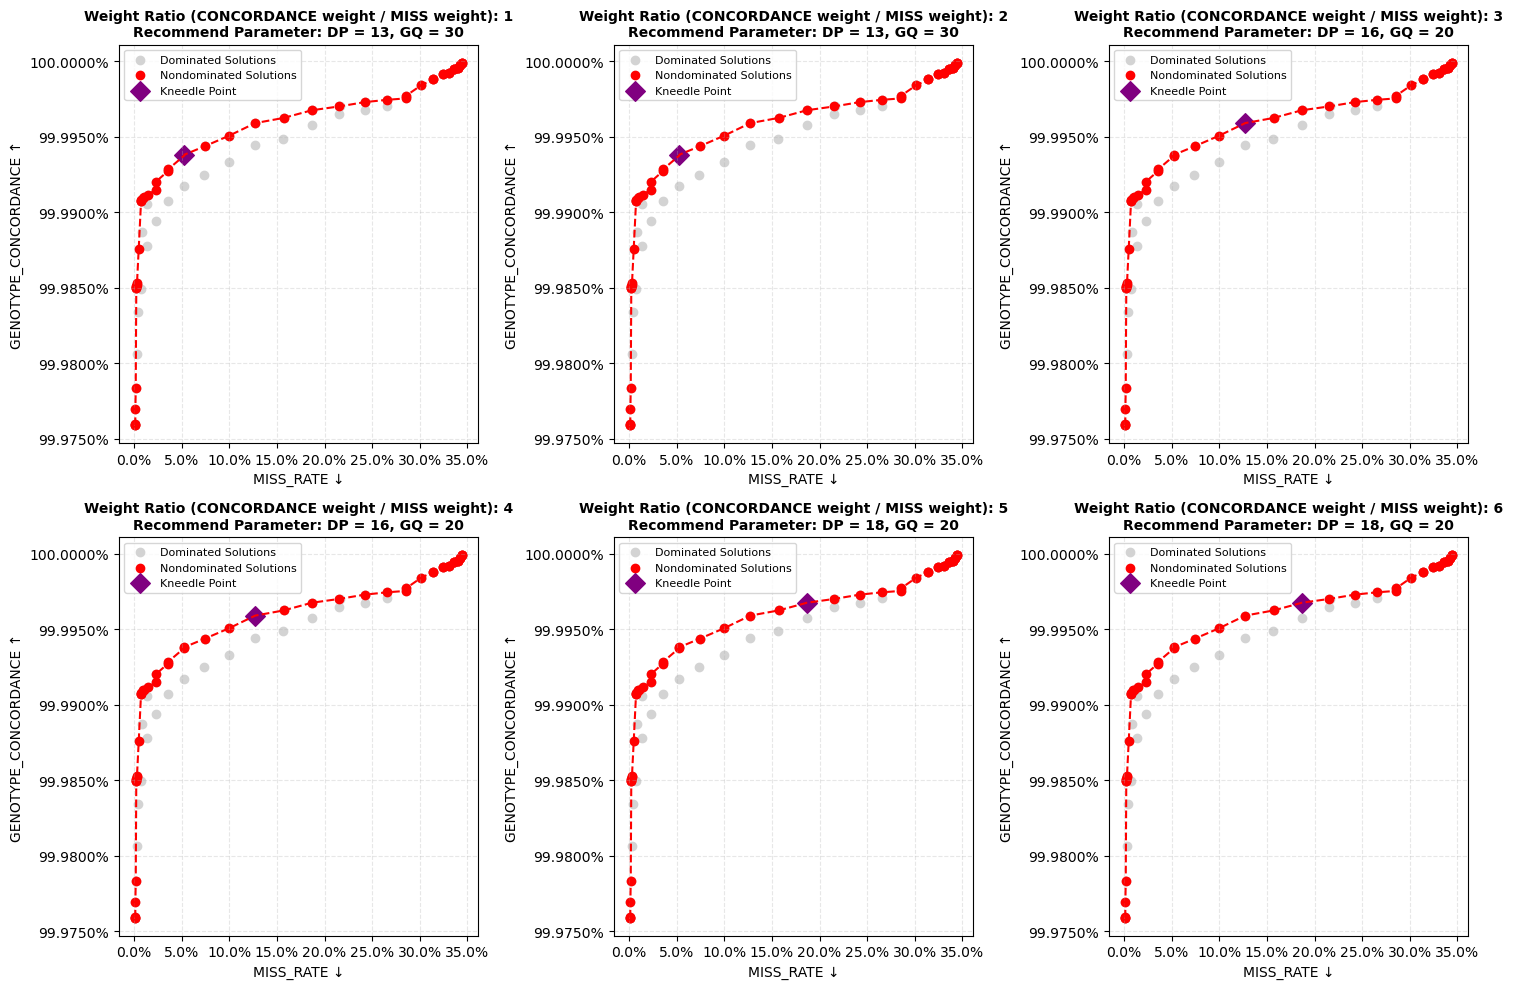

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

# === Step 1: Identify Pareto Front ===
def find_pareto_front(df, metric1_col='GENOTYPE_CONCORDANCE', metric2_col='MISS_RATE',
                      maximize_metric1=True, maximize_metric2=False):
    m1 = df[metric1_col].values
    m2 = df[metric2_col].values
    is_efficient = np.ones(len(df), dtype=bool)
    for i in range(len(df)):
        if is_efficient[i]:
            better_m1 = m1 >= m1[i] if maximize_metric1 else m1 <= m1[i]
            better_m2 = m2 >= m2[i] if maximize_metric2 else m2 <= m2[i]
            strictly_better_m1 = m1 > m1[i] if maximize_metric1 else m1 < m1[i]
            strictly_better_m2 = m2 > m2[i] if maximize_metric2 else m2 < m2[i]
            is_dominated = (better_m1 & better_m2) & (strictly_better_m1 | strictly_better_m2)
            is_dominated[i] = False
            if np.any(is_dominated):
                is_efficient[i] = False
    return pd.Series(is_efficient, index=df.index)

# === Step 2: Kneedle 拐点检测（标准化后处理） ===
def find_kneedle_tradeoff_point(df, x_col='MISS_RATE', y_col='GENOTYPE_CONCORDANCE',
                                 curve='concave', direction='increasing', S=1.0, weight_x=1.0, weight_y=1.0):
    df_unique = df[[x_col, y_col, 'DP', 'GQ']].drop_duplicates().sort_values(by=x_col)
    x = df_unique[x_col].values
    y = df_unique[y_col].values

    # 标准化 (Kneedle 会自动处理)
    scaler = MinMaxScaler()
    xy_scaled = scaler.fit_transform(np.column_stack((x, y)))
    x_scaled = xy_scaled[:, 0]
    y_scaled = xy_scaled[:, 1]

    # 使用 Kneedle
    kneedle = KneeLocator(x, y, curve=curve, direction=direction, S=S, weight_x=weight_x, weight_y=weight_y)

    if kneedle.knee is not None:
        # 正确查找 knee 对应的索引
        knee_index = np.where(x == kneedle.knee)[0][0]
        x_real = x[knee_index]
        y_real = y[knee_index]
        dp = df_unique['DP'].iloc[knee_index]
        gq = df_unique['GQ'].iloc[knee_index]
        return x_real, y_real, dp, gq, scaler, kneedle
    else:
        return None, None, None, None, scaler, kneedle

# === Step 3: 加载数据（你需要提前准备 summary_all） ===

# summary_all['GENOTYPE_CONCORDANCE'] = summary_all['GENOTYPE_CONCORDANCE'].round(10)
# summary_all['MISS_RATE'] = summary_all['MISS_RATE'].round(10)

# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_30x)
pareto_df_sorted = summary_30x[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='GENOTYPE_CONCORDANCE',
        curve='concave',
        direction='increasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_30x['MISS_RATE'], summary_30x['GENOTYPE_CONCORDANCE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['GENOTYPE_CONCORDANCE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['GENOTYPE_CONCORDANCE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (CONCORDANCE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("GENOTYPE_CONCORDANCE ↑", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.style.use('default')
plt.tight_layout()
plt.show()

### FALSE_POSITIVE_RATE vs MISS_RATE in 30x

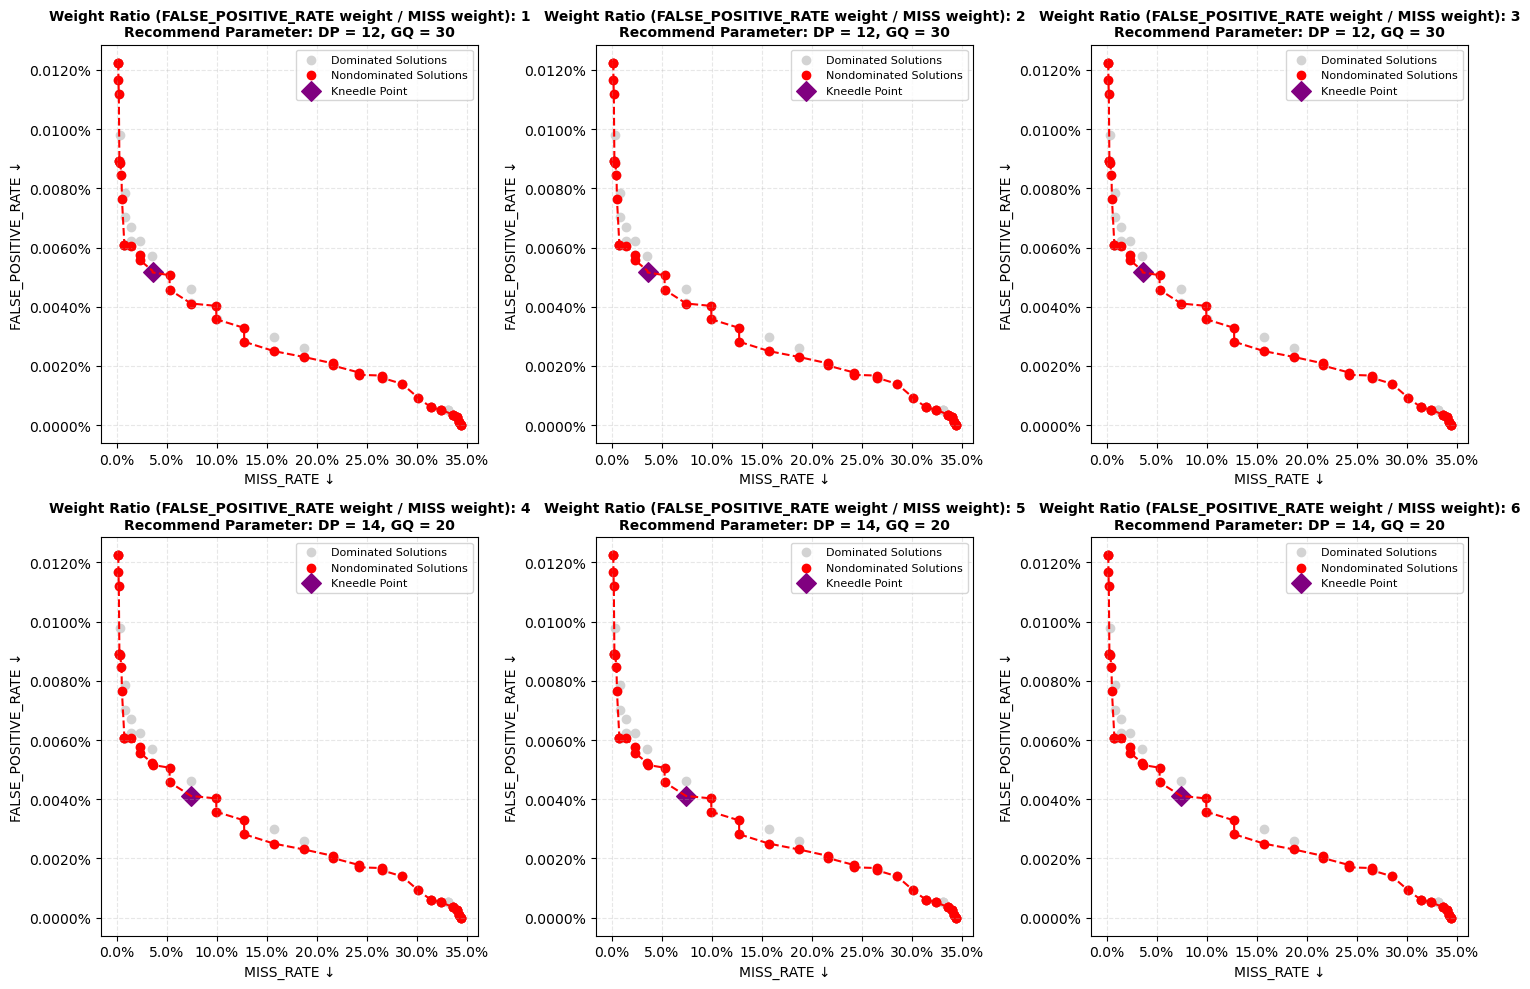

In [11]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_30x, metric1_col='FALSE_POSITIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_30x[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_POSITIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_30x['MISS_RATE'], summary_30x['FALSE_POSITIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_POSITIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_POSITIVE_RATE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_POSITIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_POSITIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

### FALSE_NEGATIVE_RATE vs MISS_RATE in 30x

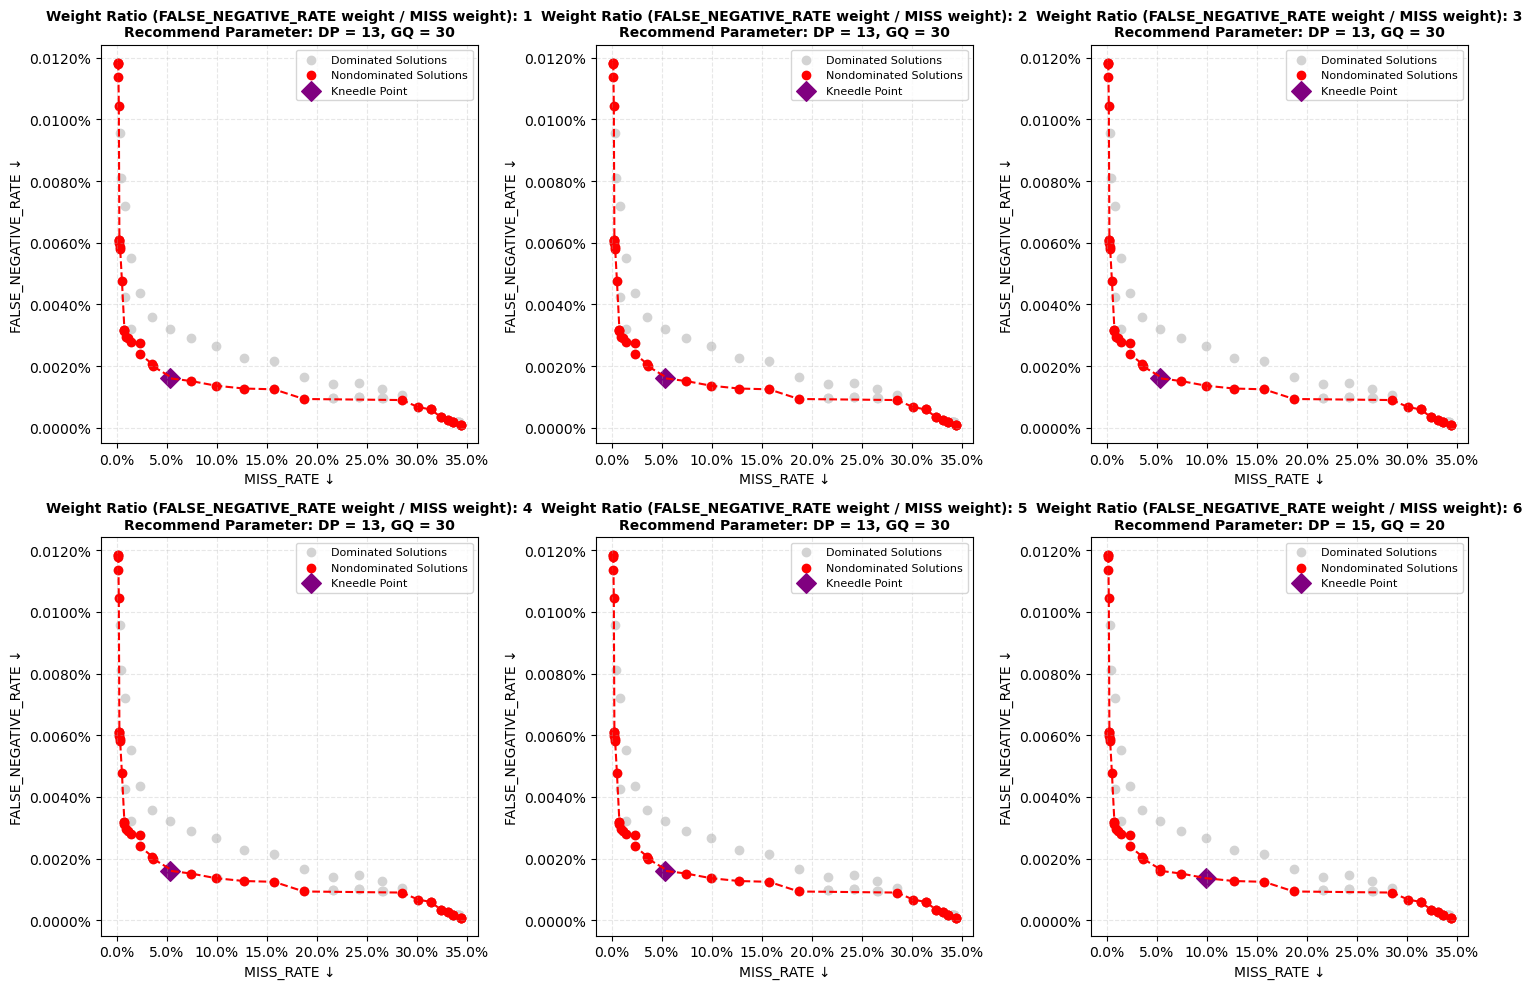

In [12]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_30x, metric1_col='FALSE_NEGATIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_30x[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_NEGATIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_30x['MISS_RATE'], summary_30x['FALSE_NEGATIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'], 'r--')

    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_NEGATIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_NEGATIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# test

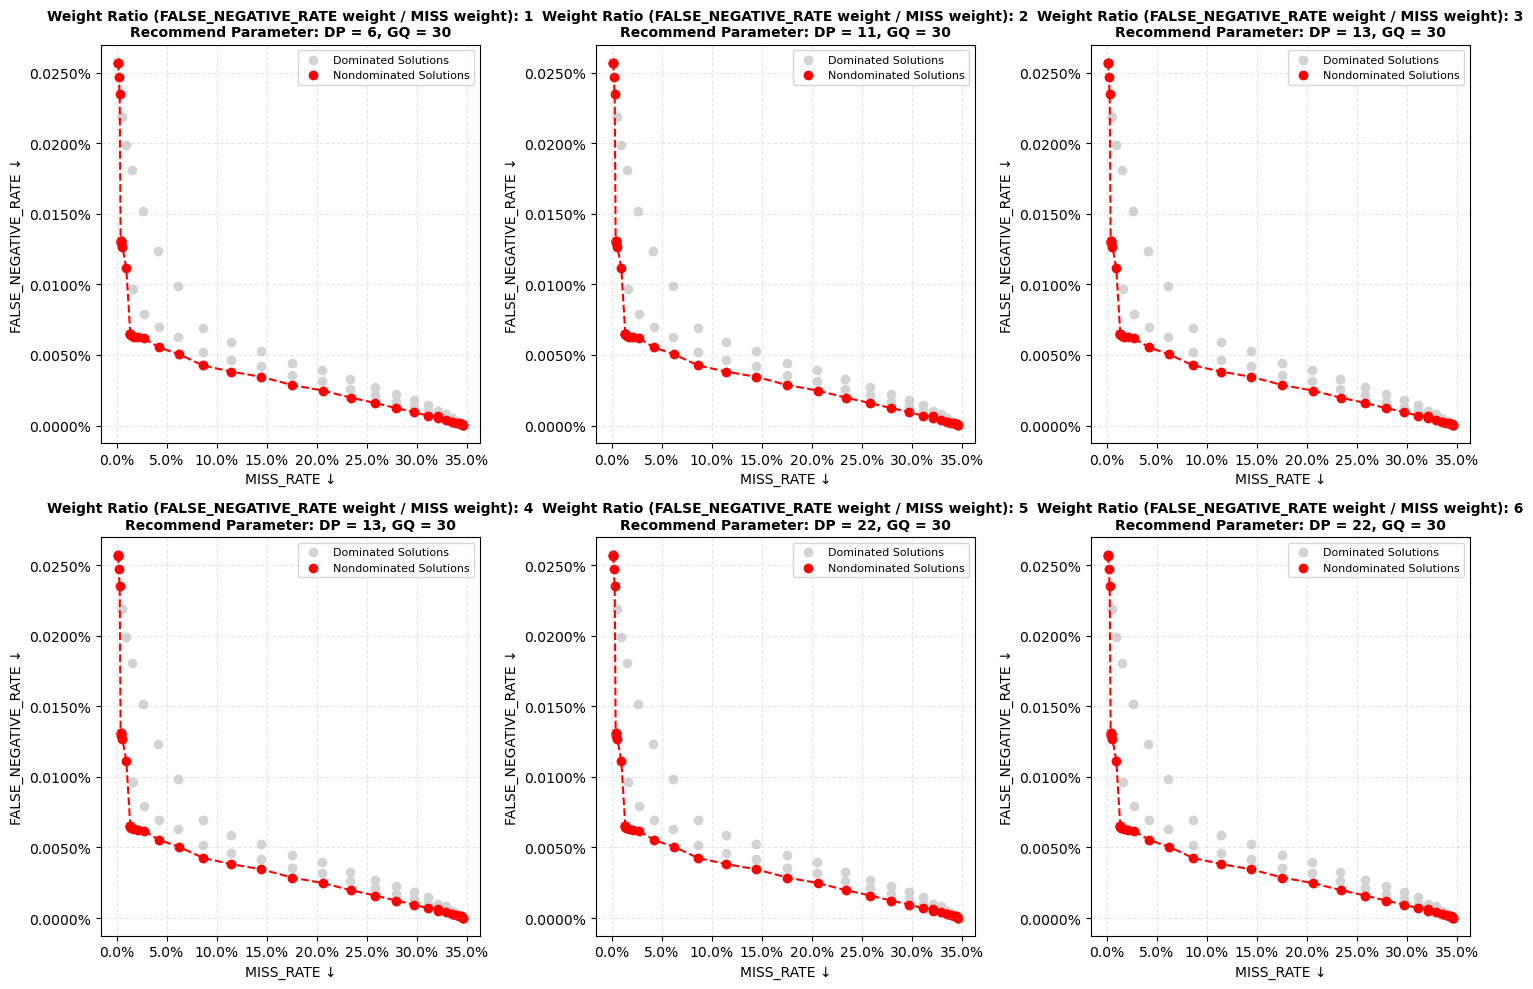

In [9]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_all, metric1_col='FALSE_NEGATIVE_RATE', metric2_col='MISS_RATE',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_all[pareto_mask].sort_values(by='MISS_RATE')

# === Step 5: Kneedle 拐点检测（合成组图） ===
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)
weight_miss = 1.0

for i, weight_ratio in enumerate(range(1, 7)):
    weight_concord = weight_miss * weight_ratio

    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MISS_RATE',
        y_col='FALSE_NEGATIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,  # 可调灵敏度
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]
    ax.scatter(summary_all['MISS_RATE'], summary_all['FALSE_NEGATIVE_RATE'],
               c='lightgray', label='Dominated Solutions')
    ax.scatter(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'],
               c='red', label='Nondominated Solutions')
    ax.plot(pareto_df_sorted['MISS_RATE'], pareto_df_sorted['FALSE_NEGATIVE_RATE'], 'r--')

    if x_k is not None:
        # ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')
        ax.set_title(f"Weight Ratio (FALSE_NEGATIVE_RATE weight / MISS weight): {weight_ratio}\n"
                     f"Recommend Parameter: DP = {dp_k}, GQ = {gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {weight_ratio}\nNo Kneedle Point", fontsize=10, fontweight='bold')

    ax.set_xlabel("MISS_RATE ↓", fontsize=10)
    ax.set_ylabel("FALSE_NEGATIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()